# DEFINITION OF FUNCTIONS

In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [17]:
def lambert_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(8,8))
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
        m.drawcoastlines()
       
        #m2      = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
        #          rsphere=(6378137.00,6356752.3142),\
        #          resolution='l',area_thresh=1000.,projection='lcc',\
        #          lat_1=65.,lon_0=180.)
        #xm2, ym2  = m2(LON, LAT)
        #im2     = m2.plot(xm2,ym2,'*', color='k',linewidth=2.)

        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

***

# PACKAGES

In [3]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

# Salinity

In [4]:
# Load variables
mean_Salt_surf = pickle_load('mean_Salt_surf', '/data/ebent')
mean_Salt_30 = pickle_load('mean_Salt_30', '/data/ebent')
mean_Salt_100 = pickle_load('mean_Salt_100', '/data/ebent')
mean_Salt_200 = pickle_load('mean_Salt_200', '/data/ebent')
mean_Salt_500 = pickle_load('mean_Salt_500', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Salt_surf.npy')
('loaded from : ', '/data/ebent/mean_Salt_30.npy')
('loaded from : ', '/data/ebent/mean_Salt_100.npy')
('loaded from : ', '/data/ebent/mean_Salt_200.npy')
('loaded from : ', '/data/ebent/mean_Salt_500.npy')


In [5]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Salt.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Salt.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Salt.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Salt.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Salt.nc','r')

In [6]:
file1.variables.keys()

[u'time', u'lat', u'lon', u'depth', u'Salt']

In [7]:
# Select a specific region
lon_min = 1950
lon_max = 2520
lat_min = 0
lat_max = 541

In [8]:
lat = file1.variables['lat'][:]
lon = file1.variables['lon'][:]

In [9]:
print(lon[lon_min], lon[lon_max], lat[lat_min], lat[lat_max])

(162.54167175292969, 210.04167175292969, -77.9913330078125, -63.982769012451172)


In [10]:
lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)

depth = file1.variables['depth'][:]
surf = depth[0]
depth_100 = depth[24]
depth_200 = depth[39]
print(surf, depth_100, depth_200)

(1.0, 102.5, 205.0)


## Surface

In [14]:
mean_Salt_surf= (np.ma.mean(file1.variables['Salt'][19:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [31]:
print(mean_Salt_surf.min(), mean_Salt_surf.max(), np.mean(mean_Salt_surf))

(34.50197225940088, 34.933174887941732, 34.724150387829368)


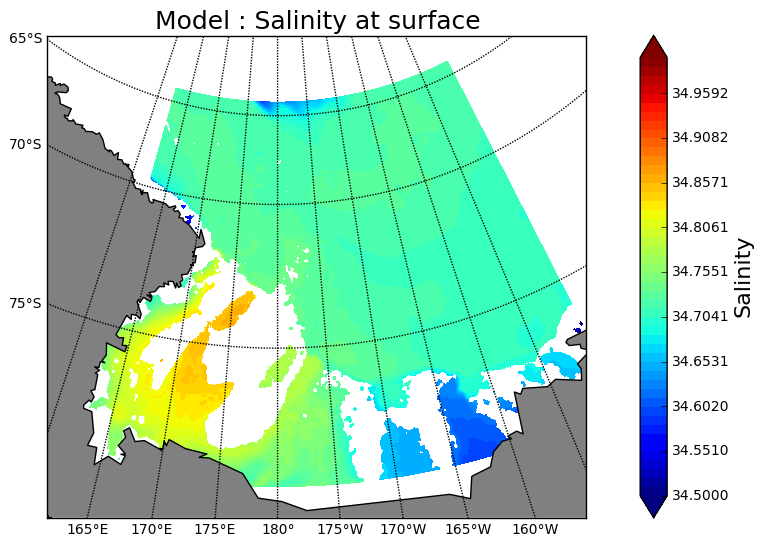

In [29]:
lambert_map(np.linspace(34.5,35,50), Lon, Lat, mean_Salt_surf, 'Model : Salinity at surface', 'Salinity', plt.cm.jet, plot_path_jup, 'Saltsurf_jup.png')

## 30 m deep

In [20]:
depth[9]

28.25

In [31]:
mean_Salt_30= (np.ma.mean(file1.variables['Salt'][19:,9,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [33]:
print(mean_Salt_30.min(), mean_Salt_30.max(), np.mean(mean_Salt_30))

(32.809421183742579, 35.297254447823605, 33.818404581405936)


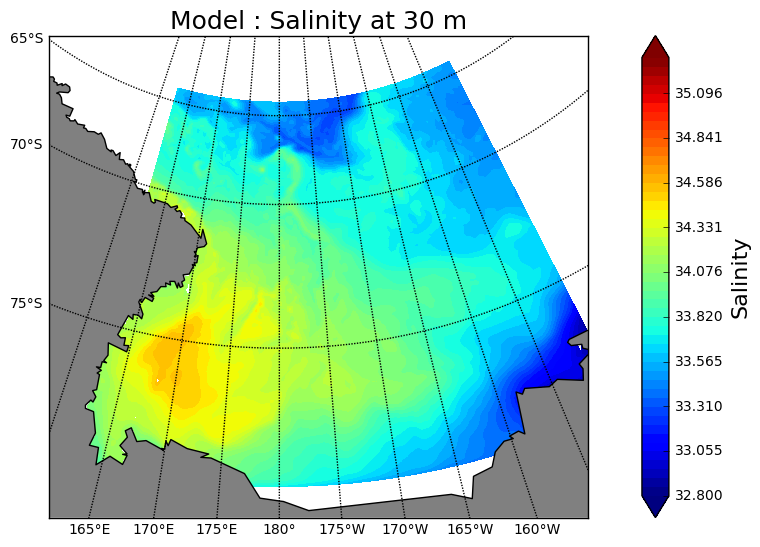

In [34]:
lambert_map(np.linspace(32.8,35.3,50), Lon, Lat, mean_Salt_30, 'Model : Salinity at 30 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_jup.png')

## 100 m deep

In [21]:
depth[24]

102.5

In [18]:
mean_Salt_100= (np.ma.mean(file1.variables['Salt'][19:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [35]:
print(mean_Salt_100.min(), mean_Salt_100.max(), np.mean(mean_Salt_100))

(33.36702064012583, 34.900890292160597, 34.39149571190859)


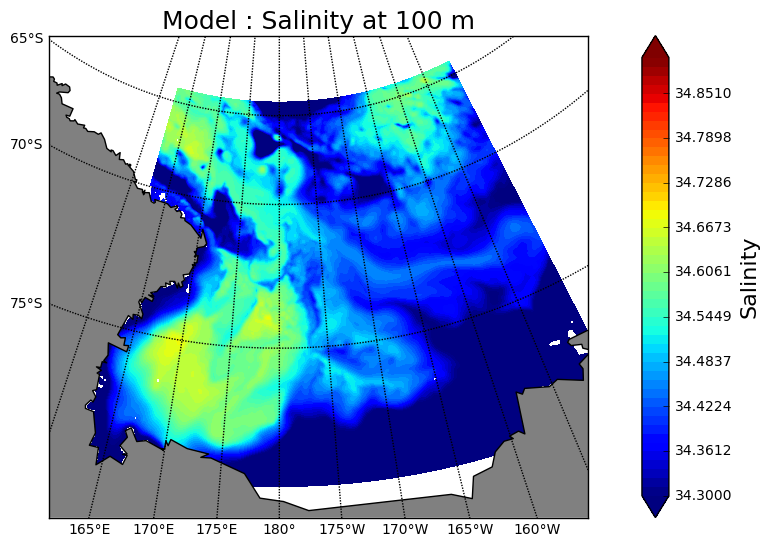

In [36]:
lambert_map(np.linspace(34.3,34.9,50), Lon, Lat, mean_Salt_100, 'Model : Salinity at 100 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt1_jup.png')

## 200 m deep

In [23]:
depth[39]

205.0

In [24]:
mean_Salt_200= (np.ma.mean(file1.variables['Salt'][19:,39,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [37]:
print(mean_Salt_200.min(), mean_Salt_200.max(), np.mean(mean_Salt_200))

(34.027692024251131, 34.851612270463576, 34.604841156454746)


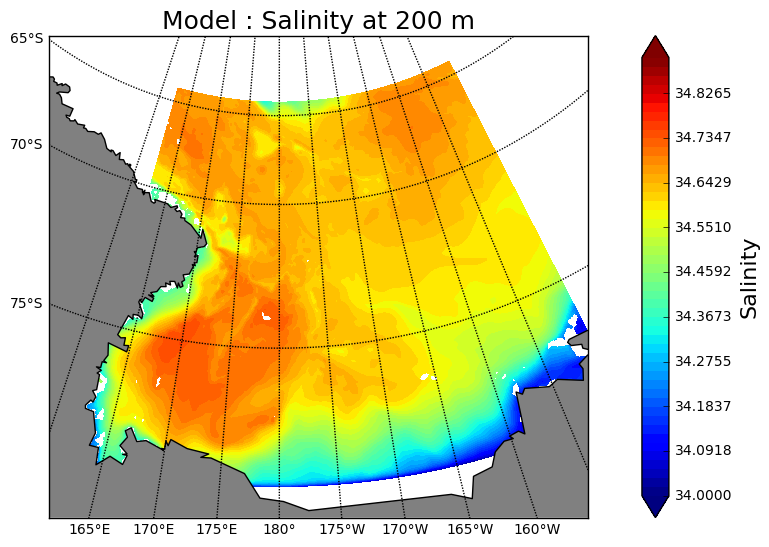

In [38]:
lambert_map(np.linspace(34,34.9,50), Lon, Lat, mean_Salt_200, 'Model : Salinity at 200 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt2_jup.png')

## 500 m deep

In [25]:
depth[59]

512.5

In [28]:
mean_Salt_500= (np.ma.mean(file1.variables['Salt'][19:,59,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [26]:
pickle_save('mean_Salt_surf', '/data/ebent', mean_Salt_surf)
pickle_save('mean_Salt_100', '/data/ebent', mean_Salt_100)
pickle_save('mean_Salt_200', '/data/ebent', mean_Salt_200)

('saved at : ', '/data/ebent/mean_Salt_surf.npy')
('saved at : ', '/data/ebent/mean_Salt_100.npy')
('saved at : ', '/data/ebent/mean_Salt_200.npy')


In [29]:
pickle_save('mean_Salt_30', '/data/ebent', mean_Salt_30)
pickle_save('mean_Salt_500', '/data/ebent', mean_Salt_500)

('saved at : ', '/data/ebent/mean_Salt_30.npy')
('saved at : ', '/data/ebent/mean_Salt_500.npy')


In [39]:
print(mean_Salt_500.min(), mean_Salt_500.max(), np.mean(mean_Salt_500))

(34.50197225940088, 34.933174887941732, 34.724150387829368)


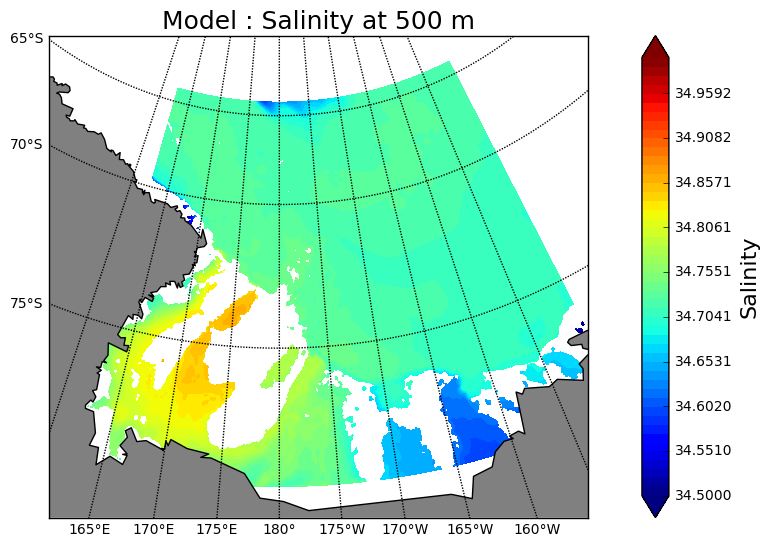

In [40]:
lambert_map(np.linspace(34.5,35,50), Lon, Lat, mean_Salt_500, 'Model : Salinity at 500 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt500_jup.png')